In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.fft import fft, ifft
#import seaborn as sns
import matplotlib as mpl

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True  # for using Times New Roman fonts
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')  #to import latex package
#mpl.style.use('default')  #for 'seaborn' style or 'default'

In [2]:
# Functin for loading data 
def load_data(data_name_without_Seri_number):  # for eample: name='Eper6Weight15.txt'
    #Seri1 0.1<Np<=1
    n_1 = 'Seri1' + name
    D_1=np.loadtxt(n_1)
    D_1=np.delete(D_1,0,axis=1)

    #Seri2 0.01<Np<0.1
    n_2 = 'Seri2' + name
    D_2=np.loadtxt(n_2)
    D_2=np.delete(D_2,0,axis=1)
    D_2=np.delete(D_2,9,axis=0)

    #Seri3 0.001<Np<0.01
    n_3 = 'Seri3' + name
    D_3=np.loadtxt(n_3)
    D_3=np.delete(D_3,0,axis=1)

    #Seri4 0.0001<Np<0.001
    n_4 = 'Seri4' + name
    D_4=np.loadtxt(n_4)
    D_4=np.delete(D_4,0,axis=1)

    #Seri5 0.00001<Np<0.0001
    n_5 = 'Seri5' + name
    D_5=np.loadtxt(n_5)
    D_5=np.delete(D_5,0,axis=1)

    #final matrix to send for fft (Mat)
    p1=np.concatenate( ( np.delete(D_5,0,1),np.delete(D_4,0,1) ), axis=0)
    p2=np.concatenate( ( p1,np.delete(D_3,0,1) ), axis=0)
    p3=np.concatenate( ( p2,np.delete(D_2,0,1) ), axis=0)
    Mat=np.concatenate( ( p3,np.delete(D_1,0,1) ), axis=0)

    return(Mat)

In [3]:
# Function to calculate fft of matrices
def fft_mat(Mat):
    lag = 5000
    fftMat = []
    for i in np.arange(0,len(Mat)):
        sig=Mat[i,:]
        t=np.arange(0,len(sig))
        L=len(t[lag:])
        Fs = 1  #sampling frequency
        Y=fft(sig[lag:])
        P2 = np.abs(Y/L)
        P1 = P2[0:int(L/2)+1]
        end=len(P1)-1
        P1[1:end] = 2*P1[1:end]
        x=np.arange(0,(int(L/2)+1))
        f = Fs*x/L
        fftMat.append(P1)
    fftMat=np.rot90(fftMat)
    fftMat=np.flipud(fftMat)
    return(fftMat)

In [4]:
#define Np range for each Seri (corresponding to eta values)
Np1=np.arange(0.1,1.1,0.1)
Np2=np.arange(0.01,0.1,0.01)
Np3=np.arange(0.001,0.01,0.001)
Np4=np.arange(0.0001,0.001,0.0001)
Np5=np.arange(0.00001,0.0001,0.00001)

two=np.append(Np5,Np4)
three=np.append(two,Np3)
four=np.append(three,Np2)
Np=np.append(four,Np1)

In [5]:
# Loading data 

for i in np.arange(10,100,10):
    # active Excitatory synapses
    name = 'ElinkN2000K200D4We1Wi15Ne' + str(i) + '.txt'
    action = 'MatLE' + str(int(i/10)) + '=load_data(name)'
    exec(action)

    # active Inhibitory synapses
    name = 'IlinkN2000K200D4We1Wi15Ne' + str(i) + '.txt'
    action = 'MatLI' + str(int(i/10)) + '=load_data(name)'
    exec(action)

    # active Excitatory neurons
    name = 'EnodeN2000K200D4We1Wi15Ne' + str(i) + '.txt'
    action = 'MatNE' + str(int(i/10)) + '=load_data(name)'
    exec(action)

    # active Inhibitory neurons
    name = 'InodeN2000K200D4We1Wi15Ne' + str(i) + '.txt'
    action = 'MatNI' + str(int(i/10)) + '=load_data(name)'
    exec(action)

In [7]:
# making total active neurons matrix to send for fft

MatN1 = MatNE1 + MatNI1
MatN2 = MatNE2 + MatNI2
MatN3 = MatNE3 + MatNI3
MatN4 = MatNE4 + MatNI4
MatN5 = MatNE5 + MatNI5
MatN6 = MatNE6 + MatNI6
MatN7 = MatNE7 + MatNI7
MatN8 = MatNE8 + MatNI8
MatN9 = MatNE9 + MatNI9

In [8]:
# make fft matrices

# For E:10
fftMat1 = fft_mat(MatN1)
#fftMat1 = fftMat1[:4000]

# For E:20
fftMat2 = fft_mat(MatN2)
#fftMat2 = fftMat2[:4000]

# For E:30
fftMat3 = fft_mat(MatN3)
#fftMat3 = fftMat3[:4000]

# For E:40
fftMat4 = fft_mat(MatN4)
#fftMat4 = fftMat4[:4000]

# For E:50
fftMat5 = fft_mat(MatN5)
fftMat5 = fftMat5[:3000]

# For E:60
fftMat6 = fft_mat(MatN6)
fftMat6 = fftMat6[:3000]

# For E:70
fftMat7 = fft_mat(MatN7)
fftMat7 = fftMat7[:3000]

# For E:80
fftMat8 = fft_mat(MatN8)
#fftMat8 = fftMat8[:4000]

# For E:90
fftMat9 = fft_mat(MatN9)
#fftMat9 = fftMat9[:4000]

In [10]:
#print(len(fftMat9))
#print(len(fftMat9[1,:]))

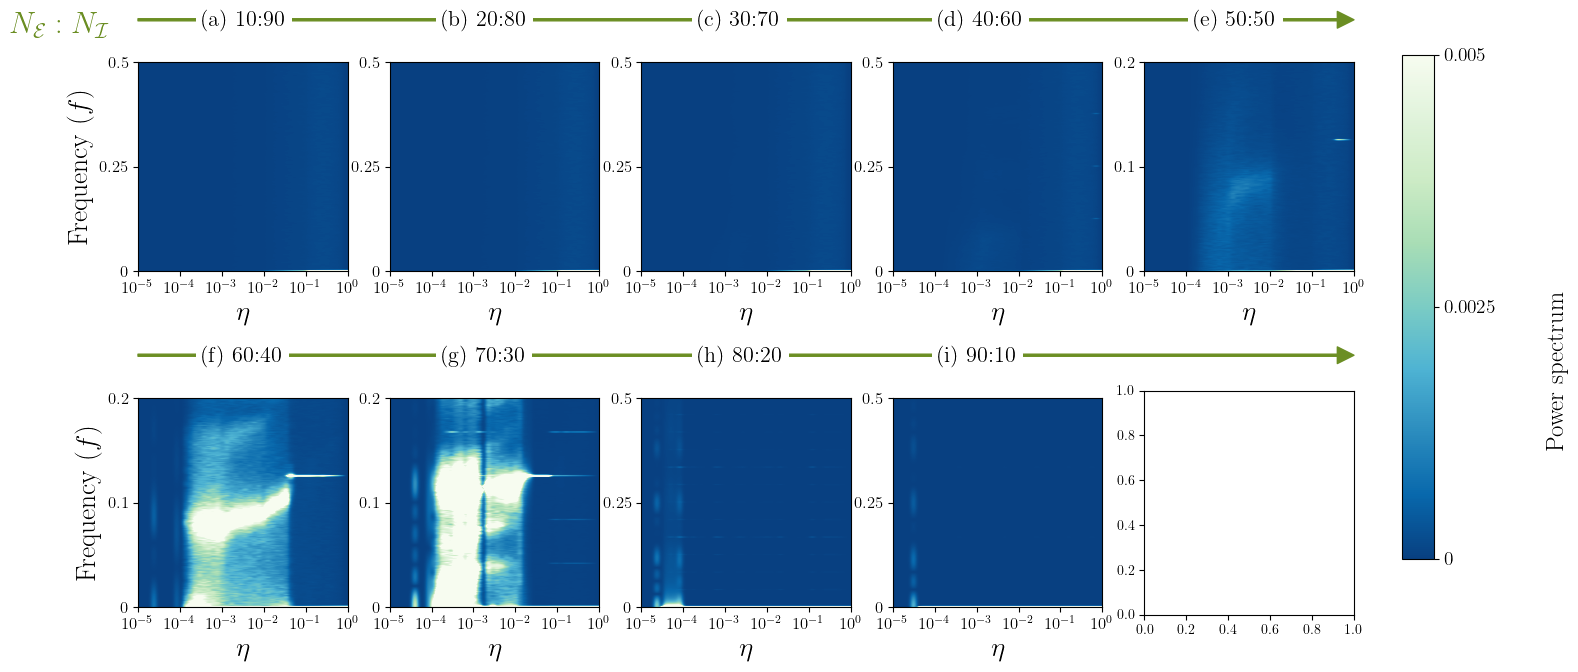

In [11]:
# Plotting the power spectrum

colormap='GnBu_r'

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,7))
im=[]

# For E:10
ax1= plt.subplot(2,5 ,1)
im=ax1.imshow(fftMat1, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Frequency~($f$)', fontsize=20)
ax1.set_yticks([0, .5, 1])
ax1.set_yticklabels([0, 0.25, 0.5])
ax1.set_xticks([0, .2, .4, .6, .8, 1])
ax1.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.xlabel(r'$\eta$', fontsize=20)


# For E:20
ax2= plt.subplot(2,5 ,2)
im=ax2.imshow(fftMat2, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax2.get_yticklabels(), visible=False)
ax2.set_yticks([0, .5, 1])
ax2.set_yticklabels([0, 0.25, 0.5])
ax2.set_xticks([0, .2, .4, .6, .8, 1])
ax2.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.25,0.25],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.07,0.07],[0,1], '--', linewidth = 1, color='C1')


# For E:30
ax3= plt.subplot(2,5 ,3)
im=ax3.imshow(fftMat3, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax3.get_yticklabels(), visible=False)
ax3.set_yticks([0, .5, 1])
ax3.set_yticklabels([0, 0.25, 0.5])
ax3.set_xticks([0, .2, .4, .6, .8, 1])
ax3.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.21,0.21],[0,1], '--', linewidth = 1, color='C1')


# For E:40
ax4= plt.subplot(2,5 ,4)
im=ax4.imshow(fftMat4, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax4.get_yticklabels(), visible=False)
ax4.set_yticks([0, .5, 1])
ax4.set_yticklabels([0, 0.25, 0.5])
ax4.set_xticks([0, .2, .4, .6, .8, 1])
ax4.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.23,0.23],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.01,0.01],[0,1], '--', linewidth = 1, color='C1')


# For E:50
ax5= plt.subplot(2,5 ,5)
im=ax5.imshow(fftMat5, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax5.get_yticklabels(), visible=False)
ax5.set_yticks([0, .5, 1])
ax5.set_yticklabels(['0', '0.1', '0.2'])
ax5.set_xticks([0, .2, .4, .6, .8, 1])
ax5.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.22,0.22],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.03,0.03],[0,1], '--', linewidth = 1, color='C1')


# For E:60
ax6= plt.subplot(2,5 ,6)
im=ax6.imshow(fftMat6, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax6.set_yticks([0, .5, 1])
ax6.set_yticklabels([0, 0.1, 0.2])
#plt.setp( ax5.get_yticklabels(), visible=False)
plt.ylabel('Frequency~($f$)', fontsize=20)
ax6.set_xticks([0, .2, .4, .6, .8, 1])
ax6.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.xlabel(r'$\eta$', fontsize=20)


# For E:70
ax7= plt.subplot(2,5 ,7)
im=ax7.imshow(fftMat7, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax7.get_yticklabels(), visible=False)
ax7.set_yticks([0, .5, 1])
ax7.set_yticklabels([0, 0.1, 0.2])
ax7.set_xticks([0, .2, .4, .6, .8, 1])
ax7.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.25,0.25],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.07,0.07],[0,1], '--', linewidth = 1, color='C1')


# For E:80
ax8= plt.subplot(2,5 ,8)
im=ax8.imshow(fftMat8, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax8.get_yticklabels(), visible=False)
ax8.set_yticks([0, .5, 1])
ax8.set_yticklabels([0, 0.25, 0.5])
ax8.set_xticks([0, .2, .4, .6, .8, 1])
ax8.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.25,0.25],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.07,0.07],[0,1], '--', linewidth = 1, color='C1')


# For E:90
ax9= plt.subplot(2,5 ,9)
im=ax9.imshow(fftMat9, cmap=colormap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\eta$', fontsize=20)
#plt.setp( ax9.get_yticklabels(), visible=False)
ax9.set_yticks([0, .5, 1])
ax9.set_yticklabels([0, 0.25, 0.5])
ax9.set_xticks([0, .2, .4, .6, .8, 1])
ax9.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
#plt.plot([0.65,0.65],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.25,0.25],[0,1], '--', linewidth = 1, color='C1')
#plt.plot([0.07,0.07],[0,1], '--', linewidth = 1, color='C1')


plt.figtext(.97, 0.34, 'Power~spectrum', fontsize=18,rotation=90, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar = fig.add_axes([0.88, 0.18, 0.02, 0.72])
ctick=fig.colorbar(im, cax=cbar, ticks=[0, 0.0025, 0.005])
for ii in cbar.get_yticklabels():
     ii.set_fontsize(14)
ctick.ax.set_yticklabels(['0', '0.0025','0.005'])

mcol='olivedrab'
ax1.annotate('', xy=(5.8, 1.2), xycoords='axes fraction', xytext=(0, 1.2), arrowprops=dict( color=mcol, width=1.5))  #, headwidth=0, headlength=0.1
ax1.annotate('', xy=(5.8, -0.4), xycoords='axes fraction', xytext=(0, -0.4), arrowprops=dict( color=mcol, width=1.5))  #, headwidth=0, headlength=0.1

plt.figtext(0.01, 0.93, r'$N_{\mathcal{E}}:N_{\mathcal{I}}$', fontsize=22, fontweight='bold', color=mcol, bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.13, 0.94, '(a)~10:90', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.28, 0.94, '(b)~20:80', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.44, 0.94, '(c)~30:70', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.59, 0.94, '(d)~40:60', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.75, 0.94, '(e)~50:50', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.13, 0.46, '(f)~60:40', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.28, 0.46, '(g)~70:30', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.44, 0.46, '(h)~80:20', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))
plt.figtext(0.59, 0.46, '(i)~90:10', fontsize=16, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=1, edgecolor='none'))


plt.subplots_adjust(top=0.9, bottom=0.1, left=0.09, right=0.85, hspace=0.5, wspace=.2)
#plt.savefig('DiffEtoI_WE1_WI15.pdf')


In [12]:
# Find variables for a balanced structure (here: Ne/Ni=Wi/We=1.5) for all etas 

W_I=1.5
node_energy=[]
synapse_energy=[]
current=[]

for row in np.arange(46):
    # making data:
    data_name='d=MatN6['+str(row)+',:]'
    exec(data_name)
    phi_E='dLE=MatLE6['+str(row)+',:]'
    exec(phi_E)
    phi_I='dLI=MatLI6['+str(row)+',:]'
    exec(phi_I)
    energy_syn_value='energy_syn_perL=dLE+dLI'
    exec(energy_syn_value)
    current_syn_value='current_syn=dLE-W_I*dLI'
    exec(current_syn_value)
    # calculating mean values of the variables for the last 1000 time steps:
    node_energy.append(sum(d[19000:20000])/1000)
    synapse_energy.append(sum(energy_syn_perL[19000:20000])/1000)
    current.append(sum(current_syn[19000:20000])/1000)

print('node_energy = ', np.round(node_energy,3))
print()
print('synapse_energy = ', np.round(synapse_energy,3))
print()
print('current = ', np.round(current,3))
print()

node_energy =  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.051
 0.051 0.08  0.11  0.12  0.124 0.138 0.118 0.142 0.142 0.156 0.165 0.16
 0.151 0.162 0.176 0.142 0.157 0.167 0.171 0.181 0.21  0.351 0.356 0.355
 0.361 0.38  0.426 0.493 0.629 0.661 0.747 0.834 0.918 1.   ]

synapse_energy =  [0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.001 0.001 0.092
 0.094 0.147 0.199 0.217 0.226 0.256 0.222 0.274 0.275 0.298 0.311 0.321
 0.295 0.317 0.334 0.315 0.335 0.374 0.379 0.402 0.447 0.709 0.733 0.733
 0.733 0.739 0.753 0.773 0.797 0.81  0.823 0.834 0.843 0.85 ]

current =  [-0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.    -0.016 -0.016 -0.026 -0.035 -0.037 -0.039 -0.044 -0.039 -0.05
 -0.052 -0.054 -0.056 -0.058 -0.053 -0.058 -0.058 -0.06  -0.059 -0.063
 -0.061 -0.061 -0.067 -0.136 -0.142 -0.142 -0.142 -0.137 -0.122 -0.102
 -0.078 -0.066 -0.052 -0.041 -0.032 -0.025]




For W_I = 1.5 :

when Ne/Ni = 0.11 :
mean_activity =  0.2
mean_current_syn =  -0.74
mean_energy_syn_perL =  0.58


when Ne/Ni = 0.25 :
mean_activity =  0.2
mean_current_syn =  -0.6
mean_energy_syn_perL =  0.57


when Ne/Ni = 0.43 :
mean_activity =  0.2
mean_current_syn =  -0.46
mean_energy_syn_perL =  0.56


when Ne/Ni = 0.67 :
mean_activity =  0.2
mean_current_syn =  -0.32
mean_energy_syn_perL =  0.55


when Ne/Ni = 1 :
mean_activity =  0.2
mean_current_syn =  -0.19
mean_energy_syn_perL =  0.54


when Ne/Ni = 1.5 :
mean_activity =  0.38
mean_current_syn =  -0.14
mean_energy_syn_perL =  0.74


when Ne/Ni = 2.33 :
mean_activity =  0.95
mean_current_syn =  0.18
mean_energy_syn_perL =  0.84


when Ne/Ni = 4 :
mean_activity =  0.99
mean_current_syn =  0.41
mean_energy_syn_perL =  0.84


when Ne/Ni = 9 :
mean_activity =  1.0
mean_current_syn =  0.62
mean_energy_syn_perL =  0.84



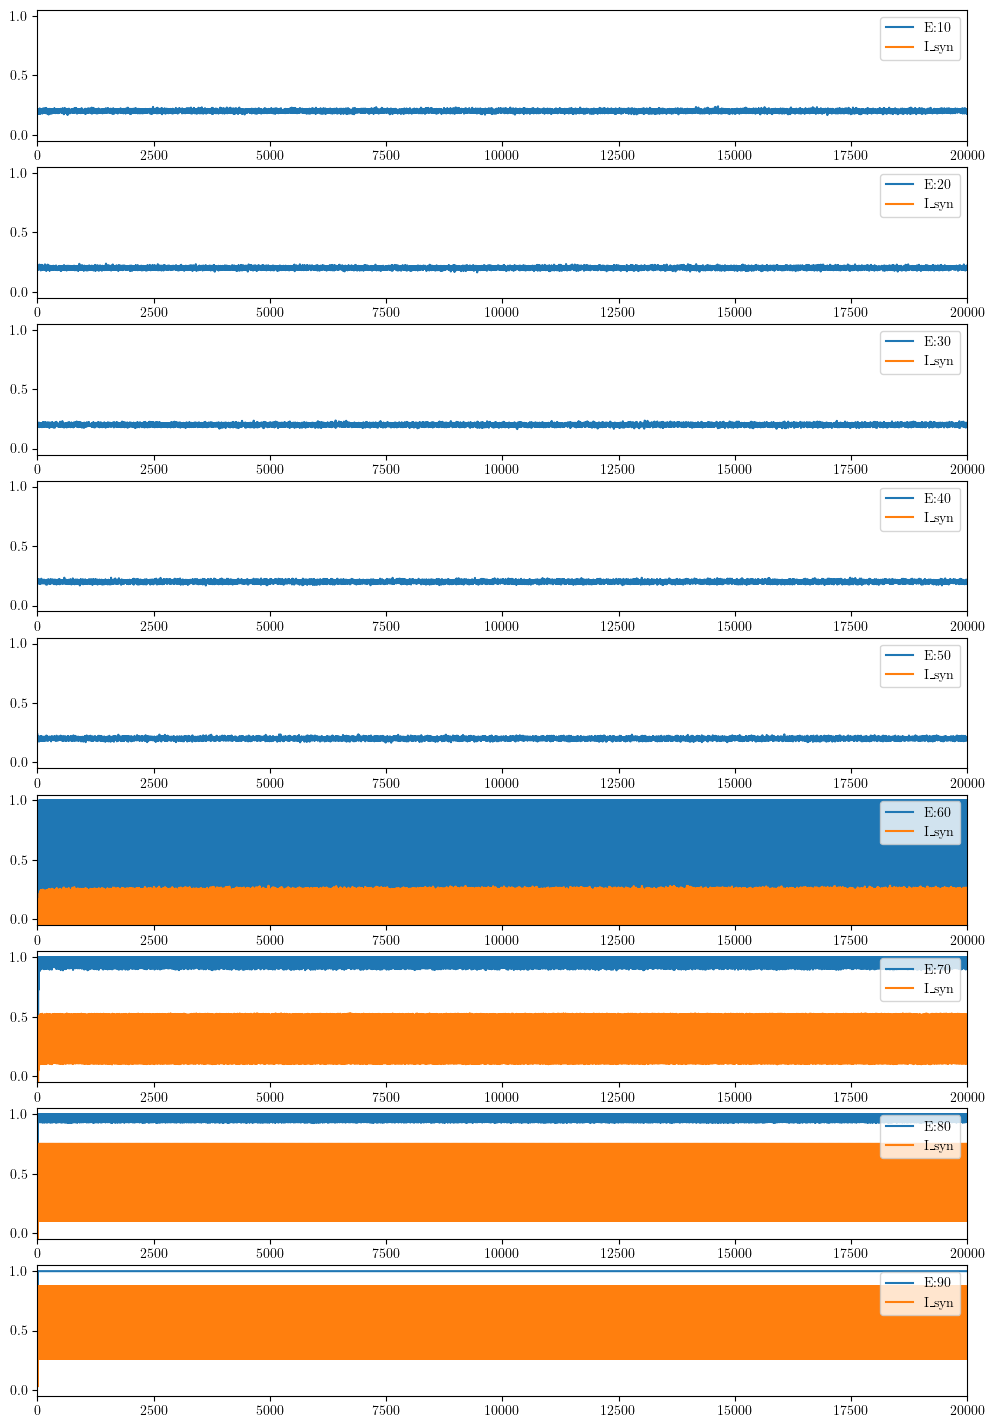

In [21]:
# Find mean values for diferent rows (Ex: row=4, 13, 22, 31, 40 corresponding to eta=5*10^{-5, -4, -3, -2, -1} )
# to make text files of mean_activity_WI15.txt, mean_synaptic_current_WI15.txt,
# and mean_synaptic_energy_WI15.txt

# Set the value of row and run the code:
row=37

W_I=1.5

x_left=0          # t=0
x_right=20000     # t=t_max

NE_NI_values=[0.11,0.25,0.43,0.67,1,1.5,2.33,4,9]

print()
print('For W_I = ' + str(W_I) + ' :')

plt.figure(figsize=(12,18))
for i in np.arange(1,10):
    # making data
    data_name='d=MatN'+str(i)+'['+str(row)+',:]'
    exec(data_name)
    phi_E='dLE=MatLE'+str(i)+'['+str(row)+',:]'
    exec(phi_E)
    phi_I='dLI=MatLI'+str(i)+'['+str(row)+',:]'
    exec(phi_I)
    current_syn_value='current_syn=dLE-W_I*dLI'
    exec(current_syn_value)
    energy_syn_value_with_a1_per_total_links='energy_syn_perL=dLE+dLI'
    exec(energy_syn_value_with_a1_per_total_links)
    # calculating variables
    mean_activity=sum(d[19000:20000])/1000
    mean_current_syn=sum(current_syn[19000:20000])/1000
    mean_energy_syn_perL=sum(energy_syn_perL[19000:20000])/1000
    print()
    print('when Ne/Ni = '+ str(NE_NI_values[i-1]) + ' :')
    print('mean_activity = ', round(mean_activity,2))
    print('mean_current_syn = ', round(mean_current_syn,2))
    print('mean_energy_syn_perL = ', round(mean_energy_syn_perL,2))
    print()
    # plotting data
    plt.subplot(9,1 ,i)
    lab='E:'+str(eval("i*10"))
    plt.plot(d, label=lab)
    plt.plot(current_syn, label='I_syn')
    plt.legend(loc='upper right')
    plt.ylim([-0.05,1.05])
    plt.xlim([x_left,x_right])

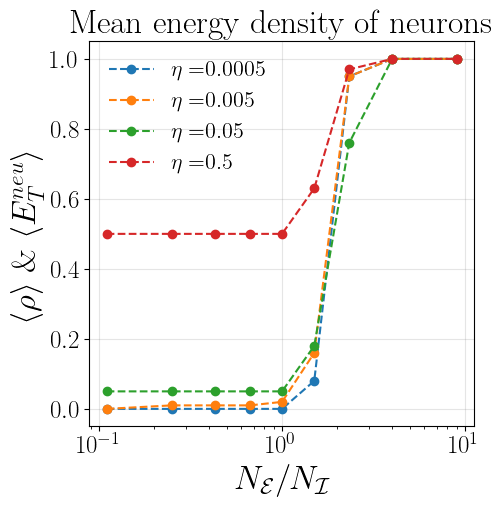

In [29]:
# Plotting mean_activity and mean_energy_of_neurons

ff=24
x_ax=[0.11, 0.25, 0.43, 0.67, 1, 1.5, 2.33, 4, 9]
eta=[0.00005, 0.0005, 0.005, 0.05, 0.5] # some selective eta values
plt.figure(figsize=(5,5))
mean_activity=np.loadtxt('mean_activity_WI15.txt')
for i in np.arange(5):
    if i==0:
        continue
    mean_act = mean_activity[i,:]
    plt.plot(x_ax, mean_act, '--o', label=r'$\eta = $'+str(eta[i]))
    plt.xlabel(r'$N_\mathcal{E} / N_\mathcal{I}$',fontsize=ff, rotation=0)
    plt.ylabel(r'$\langle \rho \rangle ~\&~ \langle E_T^{neu} \rangle$',fontsize=ff, rotation=90)
    plt.grid(':', color='C7', alpha=0.2)
    plt.title('Mean energy density of neurons', fontsize=ff)
    plt.xscale('log')
    plt.legend(fontsize=ff-8, frameon=False)
    plt.xticks(fontsize=ff-6)
    plt.yticks(fontsize=ff-6)

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.18, right=0.95)  #, hspace=0.5, wspace=.2)
#plt.savefig('MeanActivity_WE1_WI15.pdf')

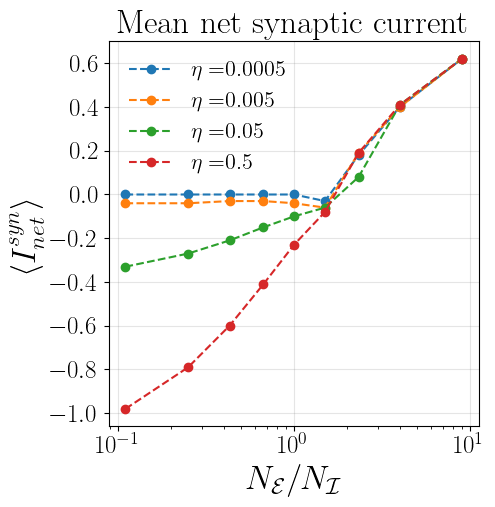

In [27]:
# Plotting mean_synaptic_current

ff=24
x_ax=[0.11, 0.25, 0.43, 0.67, 1, 1.5, 2.33, 4, 9]
eta=[0.00005, 0.0005, 0.005, 0.05, 0.5]
plt.figure(figsize=(5,5))
mean_synaptic_current=np.loadtxt('mean_synaptic_current_WI15.txt')
for i in np.arange(5):
    if i==0:
        continue
    mean_syn_curr = mean_synaptic_current[i,:]
    plt.plot(x_ax, mean_syn_curr, '--o', label=r'$\eta = $'+str(eta[i]))
    plt.xlabel(r'$N_\mathcal{E} / N_\mathcal{I}$',fontsize=ff, rotation=0)
    plt.ylabel(r'$\langle I_{net}^{syn} \rangle$',fontsize=ff, rotation=90)
    plt.grid(':', color='C7', alpha=0.2)
    plt.title('Mean net synaptic current', fontsize=ff)
    plt.xscale('log')
    plt.legend(fontsize=ff-8, frameon=False)
    plt.xticks(fontsize=ff-6)
    plt.yticks(fontsize=ff-6)

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.22, right=0.96)  #, hspace=0.5, wspace=.2)
#plt.savefig('MeanSynapticCurrent_WE1_WI15.pdf')

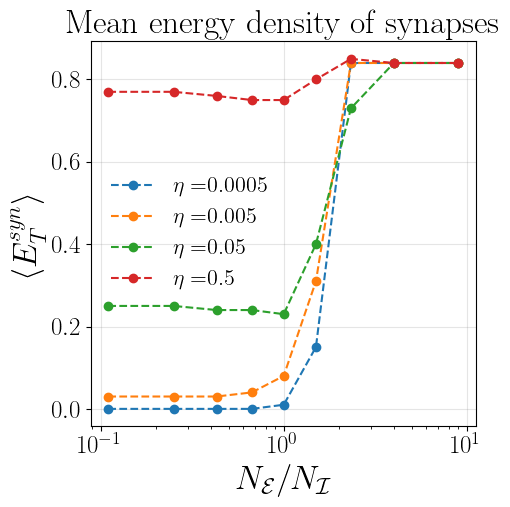

In [24]:
# Plotting mean_energy_of_synapses

ff=24
x_ax=[0.11, 0.25, 0.43, 0.67, 1, 1.5, 2.33, 4, 9]
eta=[0.00005, 0.0005, 0.005, 0.05, 0.5]
plt.figure(figsize=(5,5))
mean_synaptic_energy=np.loadtxt('mean_synaptic_energy_WI15.txt')
for i in np.arange(5):
    if i==0:
        continue
    mean_synaptic_en = mean_synaptic_energy[i,:]
    plt.plot(x_ax, mean_synaptic_en, '--o', label=r'$\eta = $'+str(eta[i]))
    plt.xlabel(r'$N_\mathcal{E} / N_\mathcal{I}$',fontsize=ff, rotation=0)
    plt.ylabel(r'$\langle E_T^{syn} \rangle$',fontsize=ff, rotation=90)
    plt.grid(':', color='C7', alpha=0.2)
    plt.title('Mean energy density of synapses', fontsize=ff)
    plt.xscale('log')
    plt.legend(fontsize=ff-8, frameon=False)
    plt.xticks(fontsize=ff-6)
    plt.yticks(fontsize=ff-6)

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.18, right=0.95)  #, hspace=0.5, wspace=.2)
#plt.savefig('MeanSynapticEnergy_WE1_WI15.pdf')

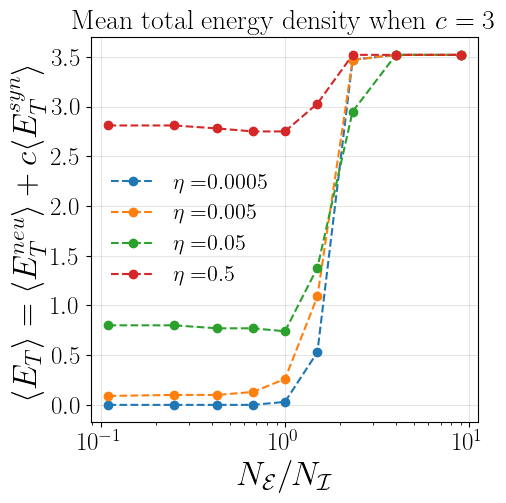

In [30]:
# Plotting mean_total_energy (neurons+synapses)

# >>> Set the coefision_of_synapse_energy corresponding to c in the paper
coefision_of_synapse_energy=3

ff=24
x_ax=[0.11, 0.25, 0.43, 0.67, 1, 1.5, 2.33, 4, 9]
eta=[0.00005, 0.0005, 0.005, 0.05, 0.5]
plt.figure(figsize=(5,5))
for i in np.arange(5):
    if i==0:
        continue
    mean_act = mean_activity[i,:]
    mean_synaptic_en = mean_synaptic_energy[i,:]
    mean_total_en = mean_act + coefision_of_synapse_energy * mean_synaptic_en
    plt.plot(x_ax, mean_total_en, '--o', label=r'$\eta = $'+str(eta[i]))
    plt.xlabel(r'$N_\mathcal{E} / N_\mathcal{I}$',fontsize=ff, rotation=0)
    plt.ylabel(r'$\langle E_T \rangle = \langle E_T^{neu} \rangle + c \langle E_T^{syn} \rangle$',fontsize=ff, rotation=90)
    plt.grid(':', color='C7', alpha=0.2)
    plt.title('Mean total energy density when~'+r'$c=3$', fontsize=ff-4)
    plt.xscale('log')
    plt.legend(fontsize=ff-8, frameon=False)
    plt.xticks(fontsize=ff-6)
    plt.yticks(fontsize=ff-6)

#plt.subplots_adjust(top=0.92, bottom=0.15, left=0.12, right=0.95)  #, hspace=0.5, wspace=.2)
#plt.savefig('MeanTotalEnergy_WE1_WI15.pdf')